# Food Prices - Final Project
----

### Summary
This notebook shows the execution of the deep learning algorithms for predicting `prices of Tomatoes`, considering the information from Mexico, available in http://www.fao.org/faostat/en/.

----

In [113]:
# Dependencies
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from tensorflow import keras
from pylab import rcParams
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [208]:
# Set properties for plots
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 8, 6

In [269]:
n_steps = 5
n_features = 1

# Fix random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [270]:
# Create data frames from file
price_df = pd.read_csv("../Resources/Prices_tomatoes.csv")

### Annual Producer Prices Prediction

In [231]:
# View results
price_df.head()

,Year,Tomatoes
0,1991,333.0
1,1992,397.4
2,1993,360.4
3,1994,361.8
4,1995,224.2


In [232]:
# Show number of rows and cols 
price_df.shape

(28, 2)

Text(0, 0.5, 'Price (USD/tonne)')

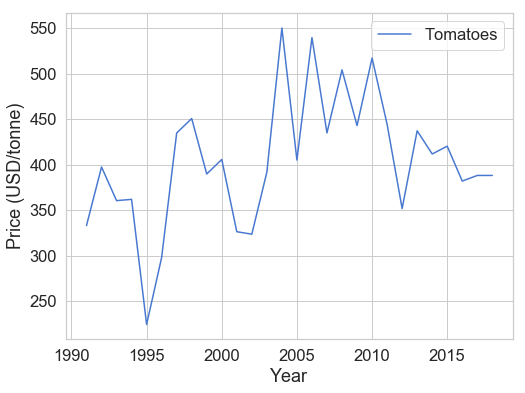

In [233]:
# Plot values
ax = price_df.plot(x='Year', y='Tomatoes');
ax.set_xlabel("Year")
ax.set_ylabel("Price (USD/tonne)")

In [234]:
# Scaling and reshaping the data frame
scaler = MinMaxScaler()
tom_price = price_df.Tomatoes.values.reshape(-1, 1)
scaled_tom = scaler.fit_transform(tom_price)

In [235]:
# Print the shape
scaled_tom.shape

(28, 1)

In [236]:
# Reshaping the scale
scaled_tom = scaled_tom.reshape(-1, 1)
scaled_tom

array([[0.33363999],
       [0.53112542],
       [0.41766329],
       [0.42195646],
       [0.        ],
       [0.22600429],
       [0.64581417],
       [0.69457222],
       [0.50751303],
       [0.55657774],
       [0.31278749],
       [0.30450782],
       [0.51364612],
       [1.        ],
       [0.55443116],
       [0.96749463],
       [0.64612082],
       [0.85863232],
       [0.67065317],
       [0.89849739],
       [0.67525299],
       [0.39098436],
       [0.65317387],
       [0.574977  ],
       [0.60134928],
       [0.48359399],
       [0.50260656],
       [0.50260656]])

In [271]:
# Set the length of the sequences
SEQ_LEN = 6

# Function to separate the values in sequences
def to_sequences(data, seq_len):
    d = []
    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])
        
    return np.array(d)

In [272]:
# Function to separate the set in training and testing
def preprocess(data_raw, seq_len, train_split):
    data = to_sequences(data_raw, seq_len)
    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test

In [273]:
# Call the function to separate the set
X_train, y_train, X_test, y_test = preprocess(scaled_tom, SEQ_LEN, train_split = 0.8)

In [274]:
# Print X values for training
X_train

array([[[0.33363999],
        [0.53112542],
        [0.41766329],
        [0.42195646],
        [0.        ]],

       [[0.53112542],
        [0.41766329],
        [0.42195646],
        [0.        ],
        [0.22600429]],

       [[0.41766329],
        [0.42195646],
        [0.        ],
        [0.22600429],
        [0.64581417]],

       [[0.42195646],
        [0.        ],
        [0.22600429],
        [0.64581417],
        [0.69457222]],

       [[0.        ],
        [0.22600429],
        [0.64581417],
        [0.69457222],
        [0.50751303]],

       [[0.22600429],
        [0.64581417],
        [0.69457222],
        [0.50751303],
        [0.55657774]],

       [[0.64581417],
        [0.69457222],
        [0.50751303],
        [0.55657774],
        [0.31278749]],

       [[0.69457222],
        [0.50751303],
        [0.55657774],
        [0.31278749],
        [0.30450782]],

       [[0.50751303],
        [0.55657774],
        [0.31278749],
        [0.30450782],
        [0.51364

In [275]:
# Print y values for training
y_train

array([[0.22600429],
       [0.64581417],
       [0.69457222],
       [0.50751303],
       [0.55657774],
       [0.31278749],
       [0.30450782],
       [0.51364612],
       [1.        ],
       [0.55443116],
       [0.96749463],
       [0.64612082],
       [0.85863232],
       [0.67065317],
       [0.89849739],
       [0.67525299],
       [0.39098436]])

In [276]:
# Print shape for training
X_train.shape

(17, 5, 1)

In [277]:
# Print shape for training
y_train.shape

(17, 1)

In [278]:
X_test

array([[[0.85863232],
        [0.67065317],
        [0.89849739],
        [0.67525299],
        [0.39098436]],

       [[0.67065317],
        [0.89849739],
        [0.67525299],
        [0.39098436],
        [0.65317387]],

       [[0.89849739],
        [0.67525299],
        [0.39098436],
        [0.65317387],
        [0.574977  ]],

       [[0.67525299],
        [0.39098436],
        [0.65317387],
        [0.574977  ],
        [0.60134928]],

       [[0.39098436],
        [0.65317387],
        [0.574977  ],
        [0.60134928],
        [0.48359399]]])

In [279]:
# Print shape for testing
X_test.shape

(5, 5, 1)

__Long Short-Term Memory (LSTM)__

In [280]:
# Initialising the model
def lstm_model():
    regressor = Sequential()
    regressor.add(LSTM(units=50, return_sequences=True, input_shape=(n_steps, n_features)))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=50, return_sequences=True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units=50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    return regressor

In [281]:
# Fit the model
BATCH_SIZE = 6
regressor  = KerasRegressor(build_fn=lstm_model, epochs=50, batch_size=BATCH_SIZE, 
                           shuffle=False, validation_split=0.1, verbose=0)
history = regressor.fit(X_train, y_train)

In [283]:
# Make the prediction
y_hat = regressor.predict(X_test)
y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat.reshape(-1, 1))
print(f"Actual Prices: {y_test_inverse}")
print(f"Predicted Prices: {y_hat_inverse}")

Actual Prices: [[437.2]
 [411.7]
 [420.3]
 [381.9]
 [388.1]]
Predicted Prices: [[468.6957 ]
 [458.97095]
 [457.11682]
 [441.12418]
 [434.85706]]


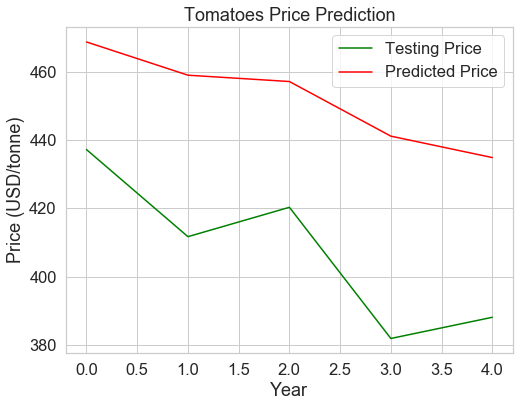

In [284]:
# Plot the results 
plt.plot(y_test_inverse, label="Testing Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Tomatoes Price Prediction')
plt.xlabel('Year')
plt.ylabel('Price (USD/tonne)')
plt.legend(loc='best')
plt.show();

In [292]:
y_van = regressor.predict(X_train)
y_van_inv = scaler.inverse_transform(y_van.reshape(-1, 1))
print(f"Predicted Prices: {y_van_inv}")

Predicted Prices: [[415.68182]
 [415.18903]
 [404.32852]
 [401.96915]
 [401.91617]
 [428.69266]
 [445.18365]
 [437.1157 ]
 [423.97607]
 [423.5981 ]
 [422.65012]
 [440.0068 ]
 [461.81802]
 [475.80865]
 [463.47333]
 [475.46198]
 [465.1162 ]]


In [285]:
warnings.filterwarnings('ignore')
# Grid search epochs, batch size
epochs = [5, 15, 25, 50, 100] 
batch_size = [1, 3, 6, 9] 
param_grid = dict(epochs=epochs, batch_size=batch_size)
# Make the search with the different parameters
grid = GridSearchCV(estimator=regressor, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train,y_train) 

# Print results
print("Best score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean %f Std (%f) with: %r" % (mean, stdev, param))

Best score: -0.051836 using {'batch_size': 1, 'epochs': 5}
Mean -0.051836 Std (0.019606) with: {'batch_size': 1, 'epochs': 5}
Mean -0.057822 Std (0.016298) with: {'batch_size': 1, 'epochs': 15}
Mean -0.060931 Std (0.013959) with: {'batch_size': 1, 'epochs': 25}
Mean -0.069101 Std (0.008435) with: {'batch_size': 1, 'epochs': 50}
Mean -0.087433 Std (0.022939) with: {'batch_size': 1, 'epochs': 100}
Mean -0.077609 Std (0.048802) with: {'batch_size': 3, 'epochs': 5}
Mean -0.056115 Std (0.019035) with: {'batch_size': 3, 'epochs': 15}
Mean -0.056129 Std (0.018099) with: {'batch_size': 3, 'epochs': 25}
Mean -0.061921 Std (0.012421) with: {'batch_size': 3, 'epochs': 50}
Mean -0.075632 Std (0.010962) with: {'batch_size': 3, 'epochs': 100}
Mean -0.199610 Std (0.050723) with: {'batch_size': 6, 'epochs': 5}
Mean -0.052671 Std (0.017155) with: {'batch_size': 6, 'epochs': 15}
Mean -0.057375 Std (0.017000) with: {'batch_size': 6, 'epochs': 25}
Mean -0.061149 Std (0.011949) with: {'batch_size': 6, 'epo

In [286]:
# List the best parameters for this dataset
print(grid_result.best_params_)
# List the best score
print(grid_result.best_score_)

{'batch_size': 1, 'epochs': 5}
-0.051835604692421516


In [287]:
# Make predictions with the hypertuned model
predictionsv = grid.predict(X_test)
y_test_inverse = scaler.inverse_transform(y_test)
predictionsv_inverse = scaler.inverse_transform(predictionsv.reshape(-1, 1))
print(f"Actual Prices: {y_test_inverse}")
print(f"Predicted Prices: {predictionsv_inverse}")

Actual Prices: [[437.2]
 [411.7]
 [420.3]
 [381.9]
 [388.1]]
Predicted Prices: [[478.10477]
 [466.81378]
 [465.1203 ]
 [445.79886]
 [438.13855]]


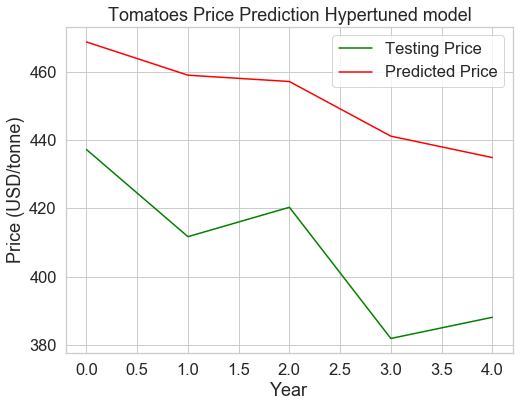

In [288]:
# Plot the results 
plt.plot(y_test_inverse, label="Testing Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Tomatoes Price Prediction Hypertuned model')
plt.xlabel('Year')
plt.ylabel('Price (USD/tonne)')
plt.legend(loc='best')
plt.show();

In [293]:
# Get the values for the training data set with the hypertuned model
y_van_gs = grid.predict(X_train)
y_van_gs_inv = scaler.inverse_transform(y_van_gs.reshape(-1, 1))
print(f"Predicted Prices: {y_van_gs_inv}")

Predicted Prices: [[416.84946]
 [417.13   ]
 [404.21332]
 [400.549  ]
 [399.2374 ]
 [430.59372]
 [450.97598]
 [442.03702]
 [426.57083]
 [425.43042]
 [423.27173]
 [442.9907 ]
 [469.0428 ]
 [486.1895 ]
 [471.1062 ]
 [485.78912]
 [473.12122]]


__Bidirectional LSTM__

In [294]:
# Define model  LSTM - Bidirectional
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))  
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [295]:
# Fit the model
BATCH_SIZE = 6

history = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=BATCH_SIZE, 
    shuffle=False,
    validation_split=0.1,
    verbose=2
)

Train on 15 samples, validate on 2 samples
Epoch 1/50
 - 9s - loss: 0.4325 - acc: 0.0000e+00 - val_loss: 0.2664 - val_acc: 0.0000e+00
Epoch 2/50
 - 0s - loss: 0.3900 - acc: 0.0000e+00 - val_loss: 0.2248 - val_acc: 0.0000e+00
Epoch 3/50
 - 0s - loss: 0.3511 - acc: 0.0000e+00 - val_loss: 0.1876 - val_acc: 0.0000e+00
Epoch 4/50
 - 0s - loss: 0.3146 - acc: 0.0000e+00 - val_loss: 0.1538 - val_acc: 0.0000e+00
Epoch 5/50
 - 0s - loss: 0.2801 - acc: 0.0000e+00 - val_loss: 0.1230 - val_acc: 0.0000e+00
Epoch 6/50
 - 0s - loss: 0.2471 - acc: 0.0000e+00 - val_loss: 0.0952 - val_acc: 0.0000e+00
Epoch 7/50
 - 0s - loss: 0.2151 - acc: 0.0000e+00 - val_loss: 0.0704 - val_acc: 0.0000e+00
Epoch 8/50
 - 0s - loss: 0.1843 - acc: 0.0000e+00 - val_loss: 0.0490 - val_acc: 0.0000e+00
Epoch 9/50
 - 0s - loss: 0.1546 - acc: 0.0000e+00 - val_loss: 0.0320 - val_acc: 0.0000e+00
Epoch 10/50
 - 0s - loss: 0.1269 - acc: 0.0000e+00 - val_loss: 0.0208 - val_acc: 0.0000e+00
Epoch 11/50
 - 0s - loss: 0.1019 - acc: 0.0000

In [296]:
# Evaluate the model
model_loss, model_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 0s - loss: 0.0152 - acc: 0.0000e+00
Normal Neural Network - Loss: 0.015220949426293373, Accuracy: 0.0


In [297]:
# Make the prediction
y_hat = model.predict(X_test)
y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)
print(f"Actual Prices: {y_test_inverse}")
print(f"Predicted Prices: {y_hat_inverse}")

Actual Prices: [[437.2]
 [411.7]
 [420.3]
 [381.9]
 [388.1]]
Predicted Prices: [[458.98666]
 [454.6568 ]
 [449.58133]
 [438.30783]
 [429.73996]]


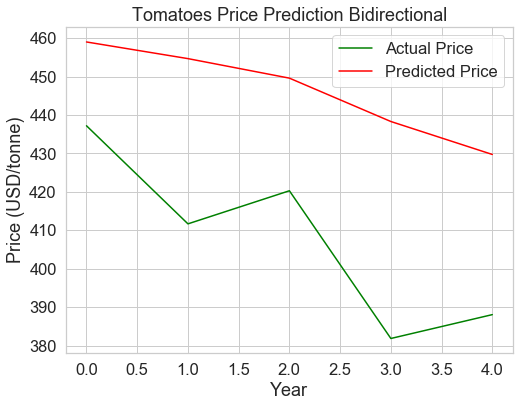

In [299]:
# Plot the results
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Tomatoes Price Prediction Bidirectional')
plt.xlabel('Year')
plt.ylabel('Price (USD/tonne)')
plt.legend(loc='best')
 
plt.show();

In [305]:
# Get the values for the training data set with the hypertuned model
y_bi = model.predict(X_train)
y_bi_inv = scaler.inverse_transform(y_bi.reshape(-1, 1))
print(f"Predicted Prices: {y_bi_inv}")

Predicted Prices: [[386.24234]
 [386.11102]
 [399.2956 ]
 [412.84662]
 [413.35873]
 [428.25418]
 [426.11496]
 [413.45667]
 [411.62018]
 [435.67166]
 [434.31036]
 [462.07785]
 [473.57266]
 [486.69028]
 [473.4269 ]
 [487.1287 ]
 [475.3424 ]]


In [301]:
# Save the model
model.save("lstmbi_price.h5")

__LSTM Bidirectional with GridSearch__

In [302]:
# Initialising the model
def lstmbi_model():
    regressorbi = Sequential()
    regressorbi.add(Bidirectional(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features))))
    regressorbi.add(Dropout(0.2))
    regressorbi.add(Bidirectional(LSTM(units=50, return_sequences=True)))
    regressorbi.add(Dropout(0.2))
    regressorbi.add(Bidirectional(LSTM(units=50)))
    regressorbi.add(Dropout(0.2))
    regressorbi.add(Dense(units=1))
    regressorbi.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    return regressorbi

In [303]:
# Fit the model
regressorbi  = KerasRegressor(build_fn=lstmbi_model, epochs=50, batch_size=BATCH_SIZE, 
                           shuffle=False, validation_split=0.1, verbose=0)
historybi = regressorbi.fit(X_train, y_train)

In [304]:
# Make the prediction
y_hatbi = regressorbi.predict(X_test)
y_test_inversebi = scaler.inverse_transform(y_test)
y_hat_inversebi = scaler.inverse_transform(y_hatbi.reshape(-1, 1))
print(f"Actual Prices: {y_test_inversebi}")
print(f"Predicted Prices: {y_hat_inversebi}")

Actual Prices: [[437.2]
 [411.7]
 [420.3]
 [381.9]
 [388.1]]
Predicted Prices: [[461.36377]
 [453.94763]
 [449.1553 ]
 [440.98624]
 [435.84122]]


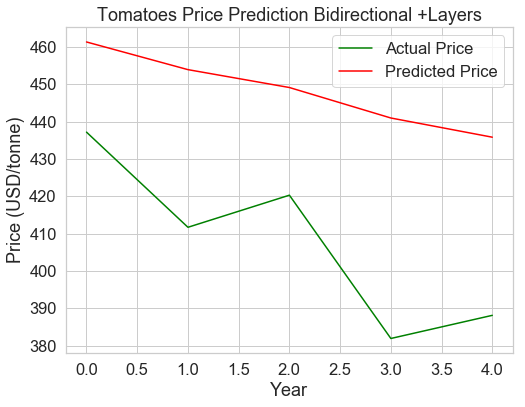

In [306]:
# Plot the results
plt.plot(y_test_inversebi, label="Actual Price", color='green')
plt.plot(y_hat_inversebi, label="Predicted Price", color='red')
 
plt.title('Tomatoes Price Prediction Bidirectional +Layers')
plt.xlabel('Year')
plt.ylabel('Price (USD/tonne)')
plt.legend(loc='best')
 
plt.show();

In [307]:
# Get the values for the training data set with the model with more layers
y_bi_lay = regressorbi.predict(X_train)
y_bi_lay_inv = scaler.inverse_transform(y_bi_lay.reshape(-1, 1))
print(f"Predicted Prices: {y_bi_lay_inv}")

Predicted Prices: [[400.38007]
 [394.59256]
 [399.80942]
 [411.9149 ]
 [418.3066 ]
 [434.5614 ]
 [433.9624 ]
 [421.18854]
 [415.64105]
 [434.05383]
 [437.5391 ]
 [460.6954 ]
 [470.53577]
 [479.7797 ]
 [470.66678]
 [480.25116]
 [472.1427 ]]


In [308]:
# Make the search with the same parameters as the LSTM Vanilla
warnings.filterwarnings('ignore')
epochsbi = [5, 20, 50, 70] 
batchbi_size = [1, 3, 6, 9] 
parambi_grid = dict(epochs=epochsbi, batch_size=batchbi_size)
gridbi = GridSearchCV(estimator=regressorbi, param_grid=parambi_grid, n_jobs=-1)
gridbi_result = gridbi.fit(X_train,y_train) 

In [309]:
# Print results
print("Best score: %f using %s" % (gridbi_result.best_score_, gridbi_result.best_params_))
meansbi = gridbi_result.cv_results_['mean_test_score']
stdsbi = gridbi_result.cv_results_['std_test_score']
paramsbi = gridbi_result.cv_results_['params']
for mean, stdev, param in zip(meansbi, stdsbi, paramsbi):
    print("Mean %f Std (%f) with: %r" % (mean, stdev, param))

Best score: -0.052035 using {'batch_size': 3, 'epochs': 20}
Mean -0.053822 Std (0.014957) with: {'batch_size': 1, 'epochs': 5}
Mean -0.061292 Std (0.007814) with: {'batch_size': 1, 'epochs': 20}
Mean -0.082415 Std (0.027298) with: {'batch_size': 1, 'epochs': 50}
Mean -0.127165 Std (0.038145) with: {'batch_size': 1, 'epochs': 70}
Mean -0.060732 Std (0.010928) with: {'batch_size': 3, 'epochs': 5}
Mean -0.052035 Std (0.014559) with: {'batch_size': 3, 'epochs': 20}
Mean -0.067330 Std (0.006079) with: {'batch_size': 3, 'epochs': 50}
Mean -0.082490 Std (0.027932) with: {'batch_size': 3, 'epochs': 70}
Mean -0.107721 Std (0.034599) with: {'batch_size': 6, 'epochs': 5}
Mean -0.054990 Std (0.014983) with: {'batch_size': 6, 'epochs': 20}
Mean -0.055266 Std (0.013350) with: {'batch_size': 6, 'epochs': 50}
Mean -0.068549 Std (0.006570) with: {'batch_size': 6, 'epochs': 70}
Mean -0.184407 Std (0.069696) with: {'batch_size': 9, 'epochs': 5}
Mean -0.058220 Std (0.014596) with: {'batch_size': 9, 'epoch

In [310]:
# Make predictions with the hypertuned model
predictionsbi = gridbi.predict(X_test)
y_test_inverse = scaler.inverse_transform(y_test)
predictionsbi_inverse = scaler.inverse_transform(predictionsbi.reshape(-1, 1))
print(f"Actual Prices: {y_test_inverse}")
print(f"Predicted Prices: {predictionsbi_inverse}")

Actual Prices: [[437.2]
 [411.7]
 [420.3]
 [381.9]
 [388.1]]
Predicted Prices: [[449.61826]
 [443.25775]
 [438.8493 ]
 [432.01538]
 [427.6922 ]]


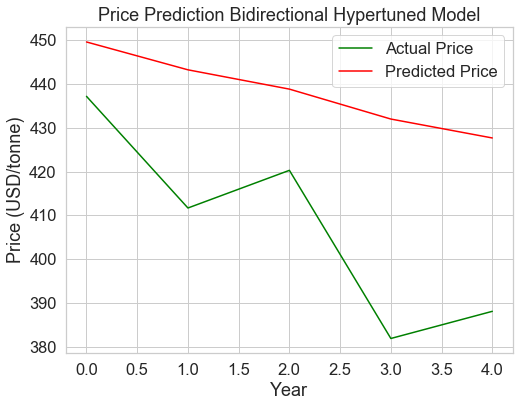

In [312]:
# Plot the results
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(predictionsbi_inverse, label="Predicted Price", color='red')
 
plt.title('Price Prediction Bidirectional Hypertuned Model')
plt.xlabel('Year')
plt.ylabel('Price (USD/tonne)')
plt.legend(loc='best')
 
plt.show();

In [313]:
# Get the values for the training data set with the hypertuned model
y_bi_gs = gridbi.predict(X_train)
y_bi_gs_inv = scaler.inverse_transform(y_bi_gs.reshape(-1, 1))
print(f"Predicted Prices: {y_bi_gs_inv}")

Predicted Prices: [[395.54587]
 [390.2715 ]
 [395.42538]
 [406.75623]
 [413.1091 ]
 [426.77457]
 [425.54108]
 [414.23862]
 [409.6673 ]
 [426.26205]
 [429.65094]
 [450.073  ]
 [458.24692]
 [465.9496 ]
 [458.3045 ]
 [466.38873]
 [459.53726]]
